In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df=pd.read_csv('CoronavirusTrends [tinyurl.com_coronavirustrends] - infections.csv', sep=',')

In [48]:
points = df.iloc[:,[2,3,-1]]

In [65]:
def color_code(infecterede):
    hue = []
    for _ in infecterede:
        if _ > 2500:
            hue.append("red")
        elif _ > 250:
            hue.append("green")
        else:
            hue.append("blue")
    return hue
    

In [95]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Over 2500 infected')
green_patch = mpatches.Patch(color='green', label='between 2500 and 250 infected')
blue_patch = mpatches.Patch(color='blue', label='less than 250 infected')

In [113]:
df.columns[-1]

'3/10/2020'

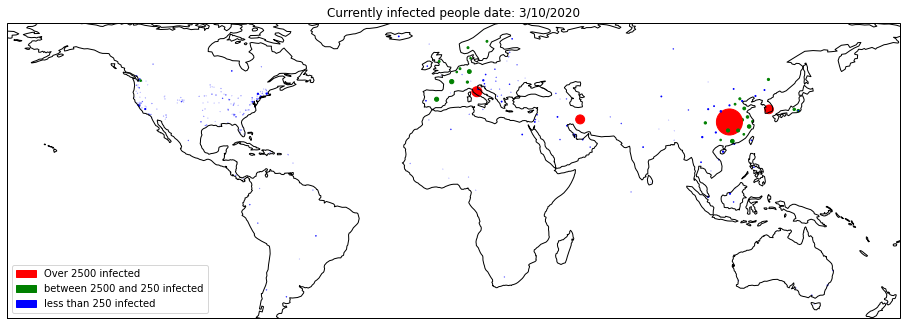

In [115]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.scatter(points["Long"], points["Lat"],s = df[df.columns[-1]]/100 , c = color_code(df[df.columns[-1]]) , label = color_code(df[df.columns[-1]])  ,transform = ccrs.PlateCarree())
ax.coastlines()
ax.legend(handles=[red_patch,green_patch,blue_patch],loc='lower left')
ax.set_title("Currently infected people date: {0}".format(df.columns[-1]))
plt.savefig('infections.png', dpi = 320)
plt.show()